<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/Data_exploration_and_Random_forest_test040721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10.07.21
Joining property sales dataset with local schools data (disadvantage pupils score).
RF on a subset of data (Colchester and Chelmsford areas for 4 months - Jan, Feb, Mar, Apr 2018) - comparing RMSE for predictions obtained from data withiot disadvantage score and with)

In [1]:
!pip install harperdb

In [2]:
import harperdb
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
url='https://ce901data-orc0770.harperdbcloud.com'
db=harperdb.HarperDB(url=url,
            username='myuser',
            password='abcdef',
            timeout=500)

In [4]:
db

Below data is extracted from the SQL database, however because of poor performance of the JOIN SQL operations, instead of relational SQL statements, the JOIN operations are performed in pandas DataFrames (according to https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).


The data extraction from SQL tables in placed within the loop to avoid the database timeout issues.


In [5]:
list_of_dfs = {}
count=0
for mt in range(1, 5):
  for yr in range (2018,2019):
    year=yr
    month=mt
    count=count+1
    #sqlstring1='SELECT bedrooms.id, bedrooms.num_of_beds, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date '
    #sqlstring2='FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE (num_of_beds>0 and deed_date LIKE "%{}/{}")'
    #sqlstring2='FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE deed_date LIKE "%{}/{}"'
    #sqlstring=sqlstring1+sqlstring2
    sqlstring='SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%{}/{}"'
    sqlstring=sqlstring.format(month,year)
    print(sqlstring)
    my_db_data=db.sql(sqlstring)
    list_of_dfs[count] = pd.DataFrame(my_db_data)
    print(list_of_dfs[count].shape)
    #masterDF = masterDF.append(list_of_dfs[count])
df_prop_sales = pd.concat(list_of_dfs, sort=False)
df_prop_sales

SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%1/2018"
(169065, 8)
SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%2/2018"
(157760, 8)
SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%3/2018"
(84147, 8)
SELECT propertypurchases.unique_id, propertypurchases

unique_id  price_paid  ...   deed_date  postcode
1 0      64342BFD-ABA7-422C-E053-6C04A8C0FB8A     1740000  ...  11/01/2018    E8 4NE
  1      64342BFD-ABAA-422C-E053-6C04A8C0FB8A     1525000  ...  19/01/2018    N5 1BZ
  2      64342BFD-ABAB-422C-E053-6C04A8C0FB8A     3306000  ...  17/01/2018   W11 1NZ
  3      64342BFD-ABAC-422C-E053-6C04A8C0FB8A      442000  ...  04/01/2018   IG3 9NB
  4      64342BFD-ABB0-422C-E053-6C04A8C0FB8A     1375000  ...  12/01/2018   W12 8JN
...                                       ...         ...  ...         ...       ...
4 72135  C18F412B-AA5E-81A6-E053-6B04A8C0AD18       55000  ...  30/04/2018  PE23 5BG
  72136  C18F412B-AA87-81A6-E053-6B04A8C0AD18       82500  ...  26/04/2018   LN8 2BE
  72137  C18F412B-AA89-81A6-E053-6B04A8C0AD18       75000  ...  05/04/2018   LN1 4AQ
  72138  C18F412B-B30B-81A6-E053-6B04A8C0AD18      150000  ...  06/04/2018   B77 2DP
  72139  C18F412B-BC4F-81A6-E053-6B04A8C0AD18     1500000  ...  30/04/2018  RH12 3XS

[483112 rows x 8 columns]

In [6]:
sqlstring='SELECT bedrooms.id, bedrooms.num_of_beds FROM projectdata.bedrooms WHERE num_of_beds>0'
bedrooms=db.sql(sqlstring)
df_bedrooms=pd.DataFrame(bedrooms)
df_bedrooms.rename(columns = {'id':'unique_id'}, inplace = True)
df_bedrooms

,unique_id,num_of_beds
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1
...,...,...
213804,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16
213805,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17
213806,64342BFF-158B-422C-E053-6C04A8C0FB8A,23
213807,75050A86-10FB-9A88-E053-6B04A8C02390,46


In [7]:
#sqlstring='SELECT bedrooms.id, bedrooms.num_of_beds, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE num_of_beds>0'
#my_db_data=db.sql(sqlstring)
#data=pd.DataFrame(my_db_data)
data = pd.merge(df_bedrooms, df_prop_sales, how="left", on="unique_id")
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN
...,...,...,...,...,...,...,...,...,...
213804,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ
213805,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA
213806,64342BFF-158B-422C-E053-6C04A8C0FB8A,23,80000.0,WOLVERHAMPTON,WOLVERHAMPTON,F,T,12/01/2018,WV2 4NA
213807,75050A86-10FB-9A88-E053-6B04A8C02390,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#check rows where postcode is NAN - these are the result of rows added on the Join with bedrooms data where bedrooms data is for sale happened after the considered period
#data_t=data[ (data['postcode'].isnull()) ]
#drop NAN rows from data
data=data.dropna(subset=['postcode'])     
data 

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN
...,...,...,...,...,...,...,...,...,...
213802,64342BFE-8A35-422C-E053-6C04A8C0FB8A,12,850000.0,LONDON,BARNET,F,S,12/01/2018,N10 1ET
213803,666758D7-2CD3-3363-E053-6B04A8C0D74E,13,840000.0,HARROGATE,HARROGATE,F,D,21/02/2018,HG1 2HS
213804,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ
213805,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA


In [9]:
#Extracting sales postcodes mappings to school postcodes 
sqlstring='SELECT  sales_pc_to_school_ps_map.sales_postcode,  sales_pc_to_school_ps_map.urn, sales_pc_to_school_ps_map.distance, sales_pc_to_school_ps_map.disadv_prct, sales_pc_to_school_ps_map.aver_attain_eng , sales_pc_to_school_ps_map.aver_attain_math FROM projectdata. sales_pc_to_school_ps_map '
local_schools=db.sql(sqlstring)
df_local_schools=pd.DataFrame(local_schools)
df_local_schools

,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math
0,AL1 1AR,138042,2.207622,25%,9.4,8.3
1,AL1 1AR,138106,1.678237,10%,12.3,10.8
2,AL1 1AR,137038,1.751870,10%,11.2,11.1
3,AL1 1AR,138582,0.455425,25%,10.6,9.2
4,AL1 1AR,117674,3.205126,79%,2.4,2.3
...,...,...,...,...,...,...
1647302,YO8 9XP,121702,1.017886,17%,9.4,9.0
1647303,YO8 9XP,144929,4.093058,19%,9.7,8.3
1647304,YO8 9XP,143138,0.700789,18%,9.6,10.1
1647305,YO8 9YB,121702,5.420481,17%,9.4,9.0


In [10]:
#special schools
data_test = df_local_schools[(df_local_schools['disadv_prct']=='NP')]
data_test


,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math
136829,BD12 8HW,107589,5.527495,NP,0.6,0.5
136846,BD12 8JJ,107589,5.583117,NP,0.6,0.5
136863,BD12 8JT,107589,5.506282,NP,0.6,0.5
136880,BD12 8JU,107589,5.459834,NP,0.6,0.5
136896,BD12 8JW,107589,5.311835,NP,0.6,0.5
...,...,...,...,...,...,...
1608151,WR5 3UA,117064,0.914355,NP,4.4,2.7
1608173,WR7 4AB,117064,5.924597,NP,4.4,2.7
1608187,WR7 4RD,117064,4.603170,NP,4.4,2.7
1608243,WR9 7NH,117064,5.608827,NP,4.4,2.7


In [11]:
#remove special schools
df_local_schools.drop(df_local_schools[df_local_schools['disadv_prct']=='NP'].index, inplace = True)
df_local_schools

,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math
0,AL1 1AR,138042,2.207622,25%,9.4,8.3
1,AL1 1AR,138106,1.678237,10%,12.3,10.8
2,AL1 1AR,137038,1.751870,10%,11.2,11.1
3,AL1 1AR,138582,0.455425,25%,10.6,9.2
4,AL1 1AR,117674,3.205126,79%,2.4,2.3
...,...,...,...,...,...,...
1647302,YO8 9XP,121702,1.017886,17%,9.4,9.0
1647303,YO8 9XP,144929,4.093058,19%,9.7,8.3
1647304,YO8 9XP,143138,0.700789,18%,9.6,10.1
1647305,YO8 9YB,121702,5.420481,17%,9.4,9.0


In [12]:
data_test = df_local_schools[(df_local_schools['disadv_prct'].isnull())]
data_test

,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math


In [13]:

df_local_schools['weight']=6-df_local_schools['distance']
df_local_schools['disadv_prct']=df_local_schools['disadv_prct'].str.replace('%','')
df_local_schools['disadv_prct'] = df_local_schools['disadv_prct'].replace(np.nan, 0)  #fillna(0)
df_local_schools['disadv_prct'] = df_local_schools['disadv_prct']. fillna(0)
df_local_schools['disadv_prct']= pd.to_numeric(df_local_schools['disadv_prct'], downcast='float')
df_local_schools

,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math,weight
0,AL1 1AR,138042,2.207622,25.0,9.4,8.3,3.792378
1,AL1 1AR,138106,1.678237,10.0,12.3,10.8,4.321763
2,AL1 1AR,137038,1.751870,10.0,11.2,11.1,4.248130
3,AL1 1AR,138582,0.455425,25.0,10.6,9.2,5.544575
4,AL1 1AR,117674,3.205126,79.0,2.4,2.3,2.794874
...,...,...,...,...,...,...,...
1647302,YO8 9XP,121702,1.017886,17.0,9.4,9.0,4.982114
1647303,YO8 9XP,144929,4.093058,19.0,9.7,8.3,1.906942
1647304,YO8 9XP,143138,0.700789,18.0,9.6,10.1,5.299211
1647305,YO8 9YB,121702,5.420481,17.0,9.4,9.0,0.579519


In [14]:
df_local_schools['score_disadv']=df_local_schools['weight'].astype(float)*df_local_schools['disadv_prct'].astype(float)
df_local_schools['score_eng']=df_local_schools['weight'].astype(float)*df_local_schools['aver_attain_eng'].astype(float)
df_local_schools['score_math']=df_local_schools['weight'].astype(float)*df_local_schools['aver_attain_math'].astype(float)
df_local_schools

,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math,weight,score_disadv,score_eng,score_math
0,AL1 1AR,138042,2.207622,25.0,9.4,8.3,3.792378,94.809455,35.648355,31.476739
1,AL1 1AR,138106,1.678237,10.0,12.3,10.8,4.321763,43.217633,53.157689,46.675044
2,AL1 1AR,137038,1.751870,10.0,11.2,11.1,4.248130,42.481302,47.579058,47.154245
3,AL1 1AR,138582,0.455425,25.0,10.6,9.2,5.544575,138.614373,58.772494,51.010089
4,AL1 1AR,117674,3.205126,79.0,2.4,2.3,2.794874,220.795029,6.707697,6.428210
...,...,...,...,...,...,...,...,...,...,...
1647302,YO8 9XP,121702,1.017886,17.0,9.4,9.0,4.982114,84.695945,46.831876,44.839030
1647303,YO8 9XP,144929,4.093058,19.0,9.7,8.3,1.906942,36.231893,18.497335,15.827616
1647304,YO8 9XP,143138,0.700789,18.0,9.6,10.1,5.299211,95.385806,50.872430,53.522036
1647305,YO8 9YB,121702,5.420481,17.0,9.4,9.0,0.579519,9.851820,5.447477,5.215670


In [15]:
sch_num=df_local_schools.groupby(['sales_postcode'])['urn'].count()
sch_num

sales_postcode
AL1 1AR    10
AL1 1HW    10
AL1 1NF    10
AL1 1PD    10
AL1 1PF    10
           ..
YO8 9SZ     3
YO8 9TE     3
YO8 9XH     3
YO8 9XP     3
YO8 9YB     2
Name: urn, Length: 145130, dtype: int64

In [16]:
g_aver_score_disadv = df_local_schools.groupby(['sales_postcode'])['score_disadv'].mean().reset_index()
g_aver_score_disadv.rename(columns = {'sales_postcode':'postcode'}, inplace = True)
g_aver_score_disadv

,postcode,score_disadv
0,AL1 1AR,70.273088
1,AL1 1HW,81.096756
2,AL1 1NF,83.645605
3,AL1 1PD,82.666617
4,AL1 1PF,82.844961
...,...,...
145125,YO8 9SZ,64.011317
145126,YO8 9TE,65.653482
145127,YO8 9XH,69.623950
145128,YO8 9XP,72.104548


In [17]:
aver_score_eng=df_local_schools.groupby(['sales_postcode'])['score_eng'].mean()
aver_score_eng

sales_postcode
AL1 1AR    37.903171
AL1 1HW    39.292717
AL1 1NF    40.237559
AL1 1PD    40.316499
AL1 1PF    40.768632
             ...    
YO8 9SZ    34.485185
YO8 9TE    35.381987
YO8 9XH    37.434635
YO8 9XP    38.733880
YO8 9YB     7.126203
Name: score_eng, Length: 145130, dtype: float64

In [18]:
aver_score_math=df_local_schools.groupby(['sales_postcode'])['score_math'].mean()
aver_score_math

sales_postcode
AL1 1AR    34.505991
AL1 1HW    35.785894
AL1 1NF    36.671135
AL1 1PD    36.738596
AL1 1PF    37.158138
             ...    
YO8 9SZ    34.245913
YO8 9TE    35.141695
YO8 9XH    36.923351
YO8 9XP    38.062894
YO8 9YB     7.239594
Name: score_math, Length: 145130, dtype: float64

In [19]:
#append disadvangate score to data
data = pd.merge(data, g_aver_score_disadv, how="left", on="postcode")
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,score_disadv
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX,85.979811
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH,129.724751
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP,40.213919
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL,65.942417
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN,73.027775
...,...,...,...,...,...,...,...,...,...,...
171436,64342BFE-8A35-422C-E053-6C04A8C0FB8A,12,850000.0,LONDON,BARNET,F,S,12/01/2018,N10 1ET,76.615053
171437,666758D7-2CD3-3363-E053-6B04A8C0D74E,13,840000.0,HARROGATE,HARROGATE,F,D,21/02/2018,HG1 2HS,45.060088
171438,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ,143.368856
171439,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA,0.000000


In [20]:
data = data[(data['district'] =='CHELMSFORD') | (data['district'] =='COLCHESTER' )]
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,score_disadv
19,6B32222C-2BE5-01F1-E053-6C04A8C0D2C8,1,210000.0,CHELMSFORD,CHELMSFORD,L,F,23/03/2018,CM2 7TT,36.121594
46,726BF13B-A542-0A46-E053-6C04A8C01D0D,1,105000.0,COLCHESTER,COLCHESTER,L,F,06/04/2018,CO1 2SL,70.791524
55,6DA08449-D865-30F2-E053-6B04A8C05F3B,1,164995.0,COLCHESTER,COLCHESTER,F,T,30/04/2018,CO4 9RH,65.036233
81,666758D6-C2F4-3363-E053-6B04A8C0D74E,1,165000.0,CHELMSFORD,CHELMSFORD,L,F,16/02/2018,CM2 7NH,47.255301
241,666758D6-C05B-3363-E053-6B04A8C0D74E,1,125500.0,COLCHESTER,COLCHESTER,F,T,14/02/2018,CO1 2NR,62.876854
...,...,...,...,...,...,...,...,...,...,...
170750,6B32222C-2E5B-01F1-E053-6C04A8C0D2C8,6,2175000.0,INGATESTONE,CHELMSFORD,F,D,22/03/2018,CM4 9PS,88.728580
170872,666758D6-C431-3363-E053-6B04A8C0D74E,6,780000.0,CHELMSFORD,CHELMSFORD,F,D,22/01/2018,CM2 8RJ,41.248240
171198,6DA08449-DE7B-30F2-E053-6B04A8C05F3B,7,995000.0,COLCHESTER,COLCHESTER,F,D,12/01/2018,CO3 3TB,63.216885
171258,6DA08449-DAF2-30F2-E053-6B04A8C05F3B,7,1225000.0,CHELMSFORD,CHELMSFORD,F,D,27/04/2018,CM3 4QP,5.006164


In [21]:
points=data['district'].unique()
points.sort()
print(len(points))

2


In [22]:
for x in points:
  data[x]=data['district']
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,score_disadv,CHELMSFORD,COLCHESTER
19,6B32222C-2BE5-01F1-E053-6C04A8C0D2C8,1,210000.0,CHELMSFORD,CHELMSFORD,L,F,23/03/2018,CM2 7TT,36.121594,CHELMSFORD,CHELMSFORD
46,726BF13B-A542-0A46-E053-6C04A8C01D0D,1,105000.0,COLCHESTER,COLCHESTER,L,F,06/04/2018,CO1 2SL,70.791524,COLCHESTER,COLCHESTER
55,6DA08449-D865-30F2-E053-6B04A8C05F3B,1,164995.0,COLCHESTER,COLCHESTER,F,T,30/04/2018,CO4 9RH,65.036233,COLCHESTER,COLCHESTER
81,666758D6-C2F4-3363-E053-6B04A8C0D74E,1,165000.0,CHELMSFORD,CHELMSFORD,L,F,16/02/2018,CM2 7NH,47.255301,CHELMSFORD,CHELMSFORD
241,666758D6-C05B-3363-E053-6B04A8C0D74E,1,125500.0,COLCHESTER,COLCHESTER,F,T,14/02/2018,CO1 2NR,62.876854,COLCHESTER,COLCHESTER
...,...,...,...,...,...,...,...,...,...,...,...,...
170750,6B32222C-2E5B-01F1-E053-6C04A8C0D2C8,6,2175000.0,INGATESTONE,CHELMSFORD,F,D,22/03/2018,CM4 9PS,88.728580,CHELMSFORD,CHELMSFORD
170872,666758D6-C431-3363-E053-6B04A8C0D74E,6,780000.0,CHELMSFORD,CHELMSFORD,F,D,22/01/2018,CM2 8RJ,41.248240,CHELMSFORD,CHELMSFORD
171198,6DA08449-DE7B-30F2-E053-6B04A8C05F3B,7,995000.0,COLCHESTER,COLCHESTER,F,D,12/01/2018,CO3 3TB,63.216885,COLCHESTER,COLCHESTER
171258,6DA08449-DAF2-30F2-E053-6B04A8C05F3B,7,1225000.0,CHELMSFORD,CHELMSFORD,F,D,27/04/2018,CM3 4QP,5.006164,CHELMSFORD,CHELMSFORD


In [23]:
for x in points:
  data[x]=data.district.str.contains(x,case=False)
  data[x]=data[x].astype(int)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,score_disadv,CHELMSFORD,COLCHESTER
19,6B32222C-2BE5-01F1-E053-6C04A8C0D2C8,1,210000.0,CHELMSFORD,CHELMSFORD,L,F,23/03/2018,CM2 7TT,36.121594,1,0
46,726BF13B-A542-0A46-E053-6C04A8C01D0D,1,105000.0,COLCHESTER,COLCHESTER,L,F,06/04/2018,CO1 2SL,70.791524,0,1
55,6DA08449-D865-30F2-E053-6B04A8C05F3B,1,164995.0,COLCHESTER,COLCHESTER,F,T,30/04/2018,CO4 9RH,65.036233,0,1
81,666758D6-C2F4-3363-E053-6B04A8C0D74E,1,165000.0,CHELMSFORD,CHELMSFORD,L,F,16/02/2018,CM2 7NH,47.255301,1,0
241,666758D6-C05B-3363-E053-6B04A8C0D74E,1,125500.0,COLCHESTER,COLCHESTER,F,T,14/02/2018,CO1 2NR,62.876854,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
170750,6B32222C-2E5B-01F1-E053-6C04A8C0D2C8,6,2175000.0,INGATESTONE,CHELMSFORD,F,D,22/03/2018,CM4 9PS,88.728580,1,0
170872,666758D6-C431-3363-E053-6B04A8C0D74E,6,780000.0,CHELMSFORD,CHELMSFORD,F,D,22/01/2018,CM2 8RJ,41.248240,1,0
171198,6DA08449-DE7B-30F2-E053-6B04A8C05F3B,7,995000.0,COLCHESTER,COLCHESTER,F,D,12/01/2018,CO3 3TB,63.216885,0,1
171258,6DA08449-DAF2-30F2-E053-6B04A8C05F3B,7,1225000.0,CHELMSFORD,CHELMSFORD,F,D,27/04/2018,CM3 4QP,5.006164,1,0


In [24]:
# Remove columns 
data.drop(['unique_id' ,'town', 'district','deed_date','postcode' ],  axis='columns', inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,num_of_beds,price_paid,estate_type,property_type,score_disadv,CHELMSFORD,COLCHESTER
19,1,210000.0,L,F,36.121594,1,0
46,1,105000.0,L,F,70.791524,0,1
55,1,164995.0,F,T,65.036233,0,1
81,1,165000.0,L,F,47.255301,1,0
241,1,125500.0,F,T,62.876854,0,1
...,...,...,...,...,...,...,...
170750,6,2175000.0,F,D,88.728580,1,0
170872,6,780000.0,F,D,41.248240,1,0
171198,7,995000.0,F,D,63.216885,0,1
171258,7,1225000.0,F,D,5.006164,1,0


In [25]:
estateTypes=data['estate_type'].unique()
estateTypes

array(['L', 'F'], dtype=object)

In [26]:
data['estate_type'] =data['estate_type'].map({'F':'2',
                             'L':'1'})
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,num_of_beds,price_paid,estate_type,property_type,score_disadv,CHELMSFORD,COLCHESTER
19,1,210000.0,1,F,36.121594,1,0
46,1,105000.0,1,F,70.791524,0,1
55,1,164995.0,2,T,65.036233,0,1
81,1,165000.0,1,F,47.255301,1,0
241,1,125500.0,2,T,62.876854,0,1
...,...,...,...,...,...,...,...
170750,6,2175000.0,2,D,88.728580,1,0
170872,6,780000.0,2,D,41.248240,1,0
171198,7,995000.0,2,D,63.216885,0,1
171258,7,1225000.0,2,D,5.006164,1,0


In [27]:
propertyTypes=data['property_type'].unique()
propertyTypes

array(['F', 'T', 'S', 'D', 'O'], dtype=object)

In [28]:
data['property_type'] =data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})
data
              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,num_of_beds,price_paid,estate_type,property_type,score_disadv,CHELMSFORD,COLCHESTER
19,1,210000.0,1,1,36.121594,1,0
46,1,105000.0,1,1,70.791524,0,1
55,1,164995.0,2,2,65.036233,0,1
81,1,165000.0,1,1,47.255301,1,0
241,1,125500.0,2,2,62.876854,0,1
...,...,...,...,...,...,...,...
170750,6,2175000.0,2,4,88.728580,1,0
170872,6,780000.0,2,4,41.248240,1,0
171198,7,995000.0,2,4,63.216885,0,1
171258,7,1225000.0,2,4,5.006164,1,0


In [60]:
#df1= data.pop('price_paid') # remove column price_paid and store it in df1
#data['price_paid']=df1 # add price_paid series as a 'new' column.
#data
df_data_new = data.loc[:, ['num_of_beds', 'estate_type', 'property_type', 'CHELMSFORD', 'COLCHESTER', 'score_disadv', 'price_paid']]
df_data_new


,num_of_beds,estate_type,property_type,CHELMSFORD,COLCHESTER,score_disadv,price_paid
147509,4,2,4,0,1,17.255262,550000.0
74428,3,2,2,1,0,32.935615,290000.0
56536,3,2,3,0,1,64.480280,280000.0
42935,2,1,1,1,0,48.076703,236000.0
169694,6,2,4,1,0,23.487950,670000.0
...,...,...,...,...,...,...,...
70079,3,2,4,1,0,29.301173,345000.0
22228,2,2,1,0,1,68.980439,200000.0
48702,2,1,1,0,1,66.646617,152000.0
160941,4,2,4,1,0,4.285425,550000.0


In [61]:
#shuffle the dataset
df_data_new = df_data_new.sample(frac = 1)
df_data_new

,num_of_beds,estate_type,property_type,CHELMSFORD,COLCHESTER,score_disadv,price_paid
139978,4,2,4,0,1,49.829466,335000.0
2959,1,1,1,0,1,10.209861,154950.0
104606,3,2,4,1,0,15.603205,525000.0
337,1,2,2,1,0,26.648022,180000.0
128592,3,2,2,0,1,54.621232,260000.0
...,...,...,...,...,...,...,...
45182,2,1,1,1,0,39.257285,187500.0
161124,4,2,4,0,1,33.438114,407500.0
14647,2,2,2,0,1,77.717676,220000.0
73453,3,2,4,1,0,51.685865,500000.0


In [62]:
dataset = df_data_new.values
dataset

array([[4, '2', '4', ..., 1, 49.82946627385714, 335000.0],
       [1, '1', '1', ..., 1, 10.209861357000001, 154950.0],
       [3, '2', '4', ..., 0, 15.603204503999997, 525000.0],
       ...,
       [2, '2', '2', ..., 1, 77.717676036, 220000.0],
       [3, '2', '4', ..., 0, 51.685865317, 500000.0],
       [3, '2', '4', ..., 0, 53.075084831374994, 485000.0]], dtype=object)

In [66]:
X1 = dataset[:,0:6]
Y1 = dataset[:,6]
#all features

In [67]:
X2 = dataset[:,0:5]
Y2 = dataset[:,6]
#all features except score_disadv

In [63]:
from sklearn import preprocessing

In [65]:
min_max_scaler = preprocessing.MinMaxScaler()

In [68]:
X1_scale = min_max_scaler.fit_transform(X1)
X1_scale

array([[0.5       , 1.        , 0.75      , 0.        , 1.        ,
        0.26681867],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.05467009],
       [0.33333333, 1.        , 0.75      , 1.        , 0.        ,
        0.08354949],
       ...,
       [0.16666667, 1.        , 0.25      , 0.        , 1.        ,
        0.41614989],
       [0.33333333, 1.        , 0.75      , 1.        , 0.        ,
        0.27675901],
       [0.33333333, 1.        , 0.75      , 1.        , 0.        ,
        0.28419778]])

In [69]:

print(min(Y1))
print(max(Y1))

73500.0
2175000.0


In [70]:
X2_scale = min_max_scaler.fit_transform(X2)
X2_scale

array([[0.5       , 1.        , 0.75      , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.33333333, 1.        , 0.75      , 1.        , 0.        ],
       ...,
       [0.16666667, 1.        , 0.25      , 0.        , 1.        ],
       [0.33333333, 1.        , 0.75      , 1.        , 0.        ],
       [0.33333333, 1.        , 0.75      , 1.        , 0.        ]])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scale, Y1, test_size=0.3)

In [73]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_scale, Y2, test_size=0.3)

In [74]:
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(912, 6) (392, 6) (912,) (392,)


In [75]:
print(X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape)

(912, 5) (392, 5) (912,) (392,)


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
regr1 = RandomForestRegressor(max_depth=3, random_state=0)
regr1.fit(X1_train, Y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [78]:
regr2 = RandomForestRegressor(max_depth=3, random_state=0)
regr2.fit(X2_train, Y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [79]:
prediction1=regr.predict(X1_test)
print(prediction1)

[170863.9130973  357711.90112177 277049.90967139 330956.98856649
 359984.6819816  313166.06602101 385842.73585735 330956.98856649
 359984.6819816  176073.06197804 705699.31469654 359984.6819816
 330956.98856649 330956.98856649 247074.68829089 313166.06602101
 553955.04197683 330956.98856649 359984.6819816  330956.98856649
 313166.06602101 360759.49631298 176948.5248906  176948.5248906
 546670.62444234 423337.79116201 313166.06602101 546670.62444234
 359984.6819816  252794.63161287 176073.06197804 546670.62444234
 293856.22409779 385842.73585735 357711.90112177 546670.62444234
 288722.8543875  288722.8543875  293856.22409779 277049.90967139
 553955.04197683 594454.34857245 594454.34857245 553955.04197683
 171739.37600987 176073.06197804 553955.04197683 385842.73585735
 171739.37600987 546670.62444234 553955.04197683 288722.8543875
 423337.79116201 435011.25309003 553955.04197683 546670.62444234
 288722.8543875  170863.9130973  252794.63161287 385842.73585735
 288722.8543875  385842.7358

In [81]:
prediction2=regr2.predict(X2_test)
print(prediction2)

[ 251715.02963869  467169.50477569  247650.06818796  344352.36074423
  344352.36074423  279416.47968857  251715.02963869  344352.36074423
  247650.06818796  247650.06818796  467169.50477569  467169.50477569
  408007.0008559   344352.36074423 1266418.76451175  352597.33492873
  411309.32670348  174764.90969885  411309.32670348  467169.50477569
  251715.02963869  284207.52634493  352597.33492873  380103.3709579
  352597.33492873  352597.33492873  262461.09320404  251654.56261188
  434053.03652309  408007.0008559   279416.47968857  174764.90969885
  352597.33492873  247650.06818796  251715.02963869  247650.06818796
  284207.52634493  174764.90969885  251654.56261188  380103.3709579
  171478.74403911  261436.06056265  344352.36074423  344352.36074423
  344352.36074423  174764.90969885  352597.33492873  581211.36127671
  262461.09320404  467169.50477569  284207.52634493  251715.02963869
  332819.74494644  352597.33492873  279416.47968857  307502.46429363
  279416.47968857  279416.47968857  

In [82]:


prediction_df1 = pd.DataFrame(X1_test)
prediction_df1['Y1'] = Y1_test
prediction_df1['predictions1'] = prediction1
prediction_df1['error1']=prediction_df1['Y1']-prediction_df1['predictions1']
prediction_df1['sq_error1']=pow((prediction_df1['Y1']-prediction_df1['predictions1']),2)
prediction_df1

,0,1,2,3,4,5,Y1,predictions1,error1,sq_error1
0,0.000000,0.0,0.00,1.0,0.0,0.183142,135000,170863.913097,-35863.9,1.28622e+09
1,0.166667,1.0,0.75,0.0,1.0,0.322879,267500,357711.901122,-90211.9,8.13819e+09
2,0.333333,1.0,0.25,1.0,0.0,0.215930,302500,277049.909671,25450.1,6.47707e+08
3,0.333333,1.0,0.50,1.0,0.0,0.256786,310000,330956.988566,-20957,4.39195e+08
4,0.333333,1.0,0.50,0.0,1.0,0.228695,285000,359984.681982,-74984.7,5.6227e+09
...,...,...,...,...,...,...,...,...,...,...
387,0.333333,1.0,0.25,1.0,0.0,0.174818,296000,277049.909671,18950.1,3.59106e+08
388,0.166667,0.0,0.00,0.0,1.0,0.358611,161500,176948.524891,-15448.5,2.38657e+08
389,0.500000,1.0,0.75,1.0,0.0,0.036189,510000,553955.041977,-43955,1.93205e+09
390,0.166667,1.0,0.25,0.0,1.0,0.269085,228000,252794.631613,-24794.6,6.14774e+08


In [83]:
root_mse1=pow(prediction_df1['sq_error1'].sum()/prediction_df1['sq_error1'].count(),0.5)
root_mse1

100786.22244562695

In [84]:
prediction_df2 = pd.DataFrame(X2_test)
prediction_df2['Y2'] = Y2_test
prediction_df2['predictions2'] = prediction2
prediction_df2['error2']=prediction_df2['Y2']-prediction_df2['predictions2']
prediction_df2['sq_error2']=pow((prediction_df2['Y2']-prediction_df2['predictions2']),2)
prediction_df2

,0,1,2,3,4,Y2,predictions2,error2,sq_error2
0,0.166667,1.0,0.50,0.0,1.0,225000,251715.029639,-26715,7.13693e+08
1,0.500000,1.0,0.75,0.0,1.0,305000,467169.504776,-162170,2.62989e+10
2,0.166667,1.0,0.25,0.0,1.0,225000,247650.068188,-22650.1,5.13026e+08
3,0.333333,1.0,0.50,1.0,0.0,311000,344352.360744,-33352.4,1.11238e+09
4,0.333333,1.0,0.50,1.0,0.0,385000,344352.360744,40647.6,1.65223e+09
...,...,...,...,...,...,...,...,...,...
387,0.166667,1.0,0.25,1.0,0.0,285000,251654.562612,33345.4,1.11192e+09
388,0.000000,0.0,0.00,0.0,1.0,131000,171478.744039,-40478.7,1.63853e+09
389,0.333333,1.0,0.50,1.0,0.0,395000,344352.360744,50647.6,2.56518e+09
390,0.333333,1.0,0.25,0.0,1.0,220000,279416.479689,-59416.5,3.53032e+09


In [85]:
root_mse2=pow(prediction_df2['sq_error2'].sum()/prediction_df2['sq_error2'].count(),0.5)
root_mse2

104520.98674055905

In [86]:
import matplotlib.pyplot as plt

In [87]:
import numpy as np

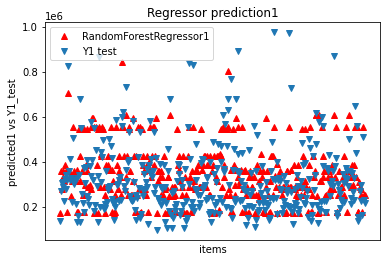

In [89]:
plt.figure()
plt.plot(prediction1, 'r^', label='RandomForestRegressor1')
plt.plot(Y1_test, 'v', label='Y1 test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction1')

plt.show()

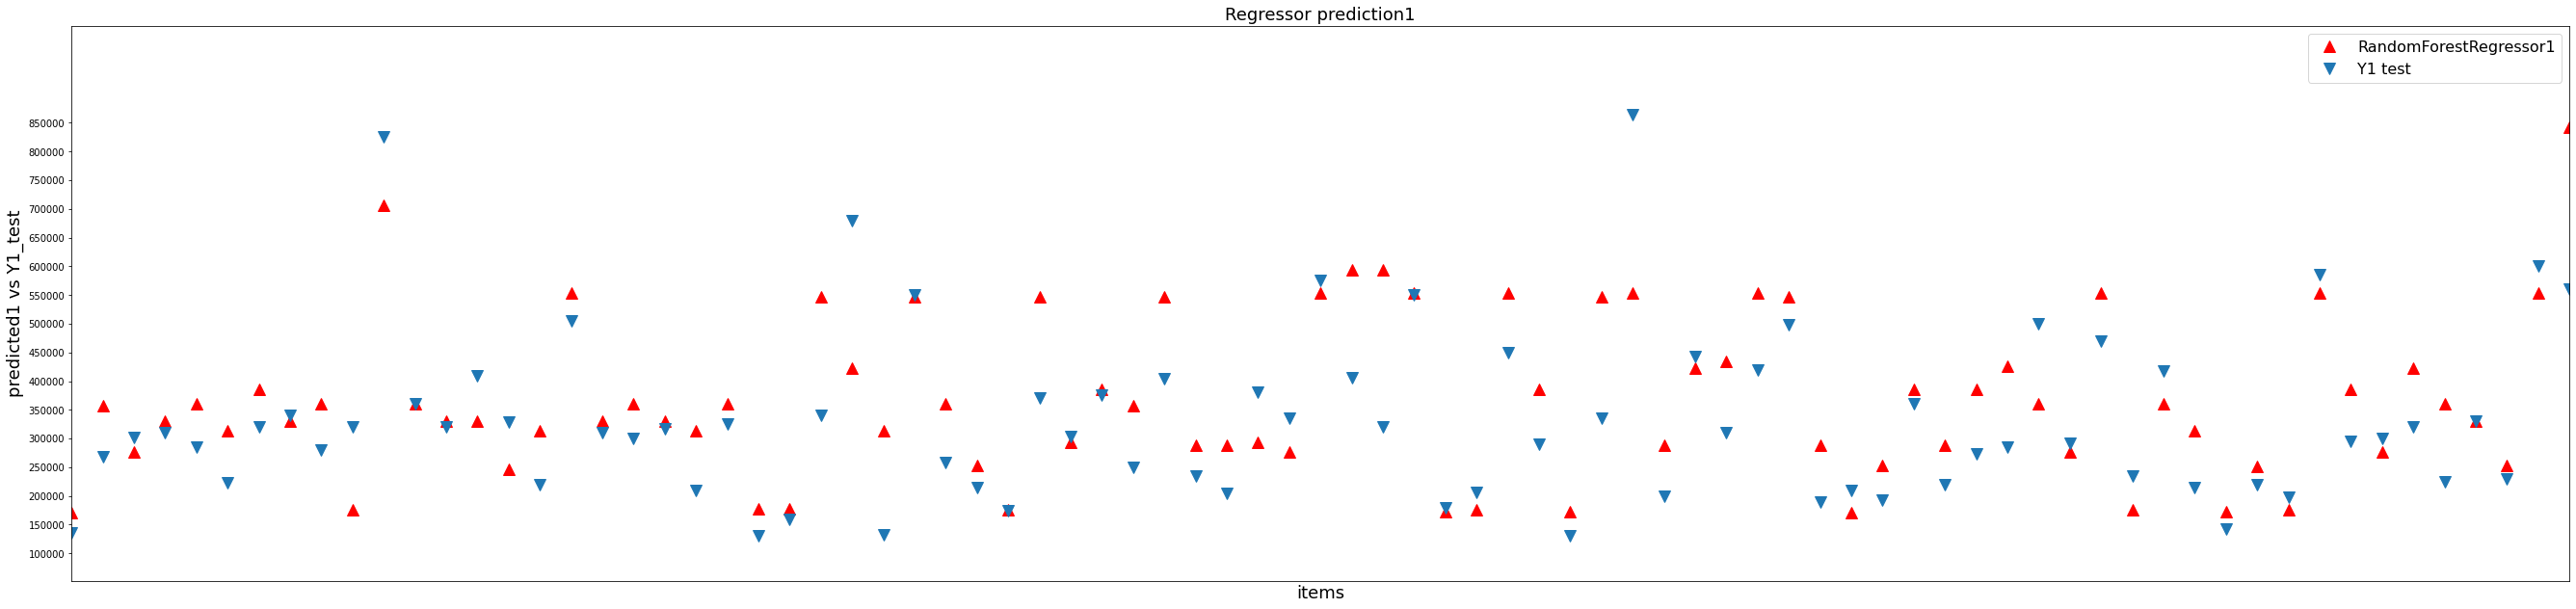

In [90]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000])
plt.yticks(np.arange(y.min(), y.max(), 50000))

axes.plot(prediction1, 'r^', label='RandomForestRegressor1',markersize=12)
axes.plot(Y1_test, 'v', label='Y1 test',markersize=12)
axes.set_xlim([0,80])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction1', fontsize=18)

plt.show()

In [91]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [92]:
mean_squared_error1=metrics.mean_squared_error(prediction1,Y1_test)
mean_squared_error1
root_mse1_2=pow(mean_squared_error1,0.5)
root_mse1_2

100786.22244562698

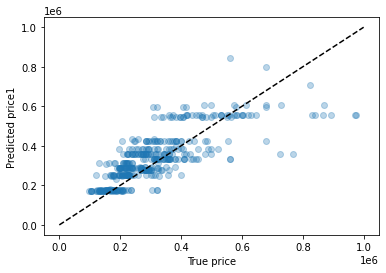

In [93]:
plt.scatter(Y1_test,prediction1,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price1')
plt.show()


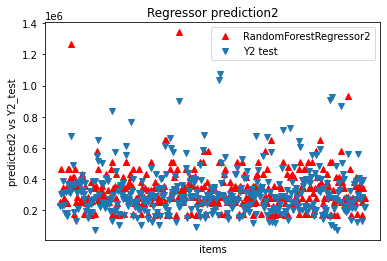

In [94]:
plt.figure()
plt.plot(prediction2, 'r^', label='RandomForestRegressor2')
plt.plot(Y2_test, 'v', label='Y2 test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted2 vs Y2_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction2')

plt.show()


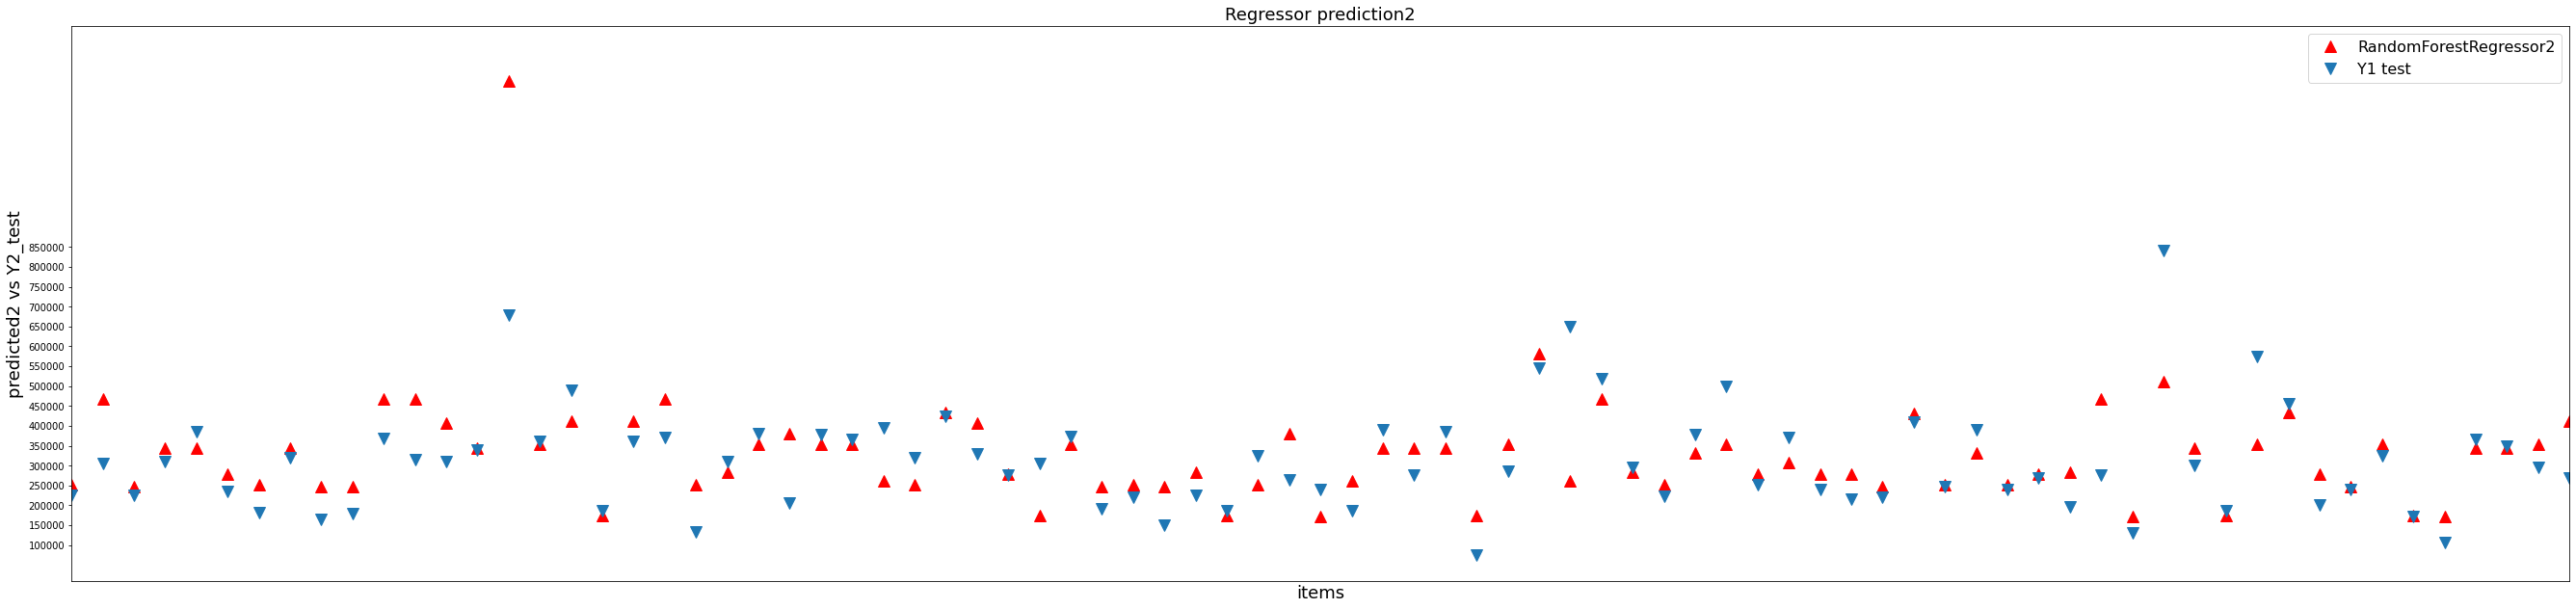

In [95]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000])
plt.yticks(np.arange(y.min(), y.max(), 50000))

axes.plot(prediction2, 'r^', label='RandomForestRegressor2',markersize=12)
axes.plot(Y2_test, 'v', label='Y1 test',markersize=12)
axes.set_xlim([0,80])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted2 vs Y2_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction2', fontsize=18)

plt.show()

In [96]:
mean_squared_error2=metrics.mean_squared_error(prediction2,Y2_test)
mean_squared_error2
root_mse2_2=pow(mean_squared_error2,0.5)
root_mse2_2

104520.98674055908

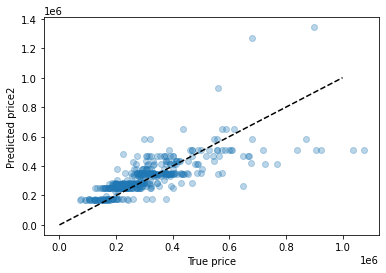

In [97]:
plt.scatter(Y2_test,prediction2,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price2')
plt.show()